# 02wk-2: 학습률, MSE, 파이토치식 코딩패턴

최규빈  
2025-03-17

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/02wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-zoOoXFPBCjKP7ipWth43-N&si=Rg6xrZA1peD-w_Q6 >}}

# 2. Imports

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 선택학습: 데이터시각화

`-` 데이터시각화2023: <https://guebin.github.io/DV2023/>

-   01wk-2: <https://guebin.github.io/DV2023/posts/01wk-2.html>
-   02wk-1: <https://guebin.github.io/DV2023/posts/02wk-1.html>

# 4. 파라메터의 학습과정 음미

In [14]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. print

In [18]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
print(f"시작값 = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-alpha * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

시작값 = tensor([-5., 10.])
loss = 8587.69   업데이트폭 = tensor([ 1.3423, -1.1889])      업데이트결과: tensor([-3.6577,  8.8111])
loss = 5675.21   업데이트폭 = tensor([ 1.1029, -0.9499])      업데이트결과: tensor([-2.5548,  7.8612])
loss = 3755.64   업데이트폭 = tensor([ 0.9056, -0.7596])      업데이트결과: tensor([-1.6492,  7.1016])
loss = 2489.58   업데이트폭 = tensor([ 0.7431, -0.6081])      업데이트결과: tensor([-0.9061,  6.4935])
loss = 1654.04   업데이트폭 = tensor([ 0.6094, -0.4872])      업데이트결과: tensor([-0.2967,  6.0063])
loss = 1102.32   업데이트폭 = tensor([ 0.4995, -0.3907])      업데이트결과: tensor([0.2028, 5.6156])
loss = 737.84    업데이트폭 = tensor([ 0.4091, -0.3136])      업데이트결과: tensor([0.6119, 5.3020])
loss = 496.97    업데이트폭 = tensor([ 0.3350, -0.2519])      업데이트결과: tensor([0.9469, 5.0501])
loss = 337.71    업데이트폭 = tensor([ 0.2742, -0.2025])      업데이트결과: tensor([1.2211, 4.8477])
loss = 232.40    업데이트폭 = tensor([ 0.2243, -0.1629])      업데이트결과: tensor([1.4454, 4.6848])
loss = 162.73    업데이트폭 = tensor([ 0.1834, -0.1311])      업데이트결과: 

## B. 시각화 – yhat의 관점에서!

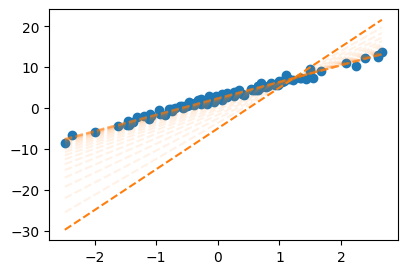

In [19]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
plt.plot(x,y,'o',label = "observed")
fig = plt.gcf()
ax = fig.gca()
ax.plot(x,X@What.data,'--',color="C1")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    ax.plot(x,X@What.data,'--',color="C1",alpha=0.1)
    What.grad = None

## C. 시각화 – loss의 관점에서!!

In [20]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    plt.close(fig)  # 자동 출력 방지
    return fig

In [21]:
# 손실 8587.6875 를 계산하는 또 다른 방식
def l(w0hat,w1hat):
    yhat = w0hat + w1hat*x
    return torch.sum((y-yhat)**2)

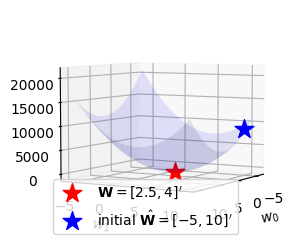

In [29]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
ax.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue', label=r"initial $\hat{\bf W}=[-5, 10]'$")
ax.legend()
fig

In [30]:
w0,w1 = What.data.reshape(-1)

In [31]:
What.data

In [32]:
w0,w1

In [33]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    w0,w1 = What.data.reshape(-1) 
    ax.scatter(w0,w1,l(w0,w1),s=5,marker='o',color='blue')
    What.grad = None

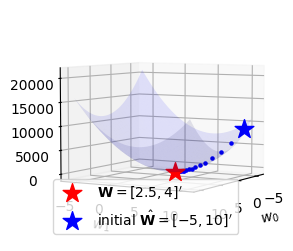

In [34]:
fig

## D. 애니메이션

In [35]:
from matplotlib import animation

In [36]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

In [37]:
def show_animation(alpha=0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = [] 
    yhat_history = [] 
    What_history = [] 

    ## 2. 학습 + 학습과정기록
    What= torch.tensor([[-5.0],[10.0]],requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30): 
        yhat=X@What ; yhat_history.append(yhat.data.tolist())
        loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
        loss.backward() 
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None    

    ## 3. 시각화 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    #### ax1: yhat의 관점에서.. 
    ax1.plot(x,y,'o',label=r"$(x_i,y_i)$")
    line, = ax1.plot(x,yhat_history[0],label=r"$(x_i,\hat{y}_i)$") 
    ax1.legend()
    #### ax2: loss의 관점에서.. 
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax2.azim = 30  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 
    ax2.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax2.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax2.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax2.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    ax2.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

In [38]:
ani = show_animation(alpha=0.001)
ani

## E. 학습률에 따른 시각화

`-` $\alpha$가 너무 작다면 비효율적임

In [39]:
show_animation(alpha=0.0001)

`-` $\alpha$가 크다고 무조건 좋은건 또 아님

In [40]:
show_animation(alpha=0.0083)

`-` 수틀리면 수렴안할수도??

In [41]:
show_animation(alpha=0.0085)

`-` 그냥 망할수도??

In [42]:
show_animation(alpha=0.01)

------------------------------------------------------------------------

In [46]:
plt.rcdefaults()
plt.rcParams['figure.figsize'] = 4.5,3.0 

------------------------------------------------------------------------

# 5. SSE $\to$ MSE

`-` 학습률을 잘 선택하는 것이 중요함

`-` 손실함수를 SSE로 설정하면 학습률 선택이 비효율적 $\to$ SSE말고 MSE를
써야함

In [47]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)/100
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

# 6. 파이토치식 코딩패턴

In [49]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. 기본패턴

In [54]:
## -- 외우세요!!! -- ##
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)/100
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

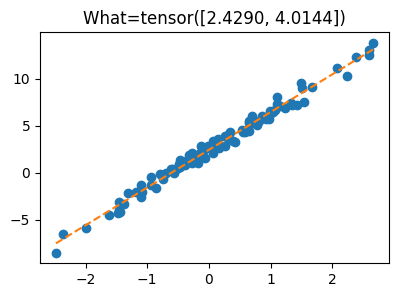

In [55]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## B. Step2의 수정 – `loss_fn` 이용

In [56]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    #loss = torch.sum((y-yhat)**2)/100
    loss = loss_fn(yhat,y) # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

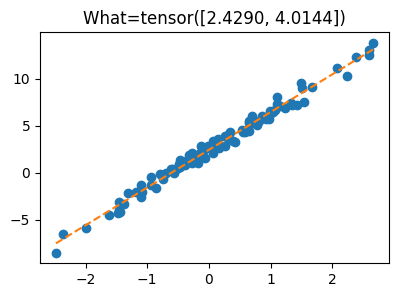

In [57]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## C. Step1의 수정 – `net` 이용

`# net` – net 오브젝트란?

원래 yhat을 이런식으로 구했는데 ~

In [60]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
(X@What.data)[:5]

아래와 같은 방식으로 코드를 짜고 싶음..

``` python
yhat = net(X) # 
```

위와 같은 코드를 가능하게 하는 `net`은 torch에서 지원하고 아래와 같이
사용할 수 있음.

In [61]:
# yhat = net(X) 
net = torch.nn.Linear(
    in_features=2, # X:(n,2) --> 2 
    out_features=1, # yhat:(n,1) --> 1 
    bias=False 
)

In [62]:
net.weight.data = torch.tensor([[-5.0,  10.0]]) # 차원이 틀렸는데?
net.weight

In [63]:
net(X)[:5]

In [64]:
(X@What)[:5]

In [65]:
(X@net.weight.T)[:5]

`#`

`-` 수정된코드

In [66]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    net.weight.data = net.weight.data - 0.1 * net.weight.grad
    net.weight.grad = None

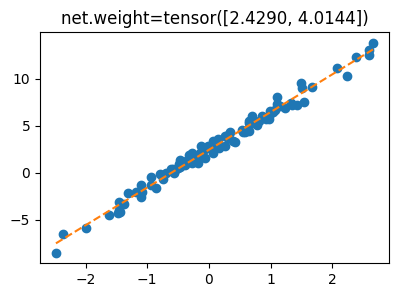

In [67]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

## D. Step4의 수정 – `optimizer`의 이용

`-` 소망: 아래의 과정을 좀 더 편하게 했으면..

``` python
net.weight.data = net.weight.data - 0.1 * net.weight.grad
net.weight.data = None 
```

`# optimizer` – 이걸 이용하면 update 과정을 손쉽게 할 수 있음

***기존코드***

In [68]:
## -- 준비과정 -- ## 
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()

In [69]:
## -- 1에폭진행 -- ## 
# step1: 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
net.weight.data = net.weight.data - 0.1 * net.weight.grad
print(net.weight.data)
net.weight.grad = None

tensor([[-5., 10.]])
tensor([[-3.6577,  8.8111]])

In [70]:
## -- 2에폭진행 -- ## 
# step1: 2에폭진행
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
net.weight.data = net.weight.data - 0.1 * net.weight.grad
print(net.weight.data)
net.weight.grad = None

tensor([[-3.6577,  8.8111]])
tensor([[-2.5548,  7.8612]])

***새로운코드*** – `optimizer` 이용

In [376]:
## -- 준비과정 -- ## 
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)

In [377]:
## -- 1에폭진행 -- ## 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()
print(net.weight.data)
#net.weight.grad = None
optimizr.zero_grad()

tensor([[-5., 10.]])
tensor([[-3.6577,  8.8111]])

In [378]:
## -- 2에폭진행 -- ## 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()
print(net.weight.data)
#net.weight.grad = None
optimizr.zero_grad()

tensor([[-3.6577,  8.8111]])
tensor([[-2.5548,  7.8612]])

`#`

`-` 수정된코드

In [58]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

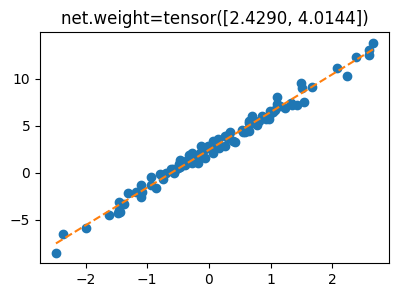

In [59]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

## E. 기타 가능한 코드

***`# 방법1`*** – net에서 bias를 사용

In [386]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
) # net(x) = x@net.weight.T + net.bias 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(x)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [387]:
net.bias.data, net.weight.data

`#`

***`# 방법2`*** – net를 쓰지않고 optimizer를 사용하는 방법 (1)

In [388]:
# step1을 위한 사전준비
what = torch.tensor(10.0,requires_grad=True)
bhat = torch.tensor(-5.0,requires_grad=True)
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD([bhat,what],lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = what*x+bhat 
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [389]:
what,bhat

`#`

***`# 방법3`*** – net를 쓰지않고 optimizer를 사용하는 방법 (2)

In [390]:
# step1을 위한 사전준비
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD([What],lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [391]:
What

`#`

## F. 잘못된(?) 코드

In [72]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [73]:
net.weight

`-` 결과시각화

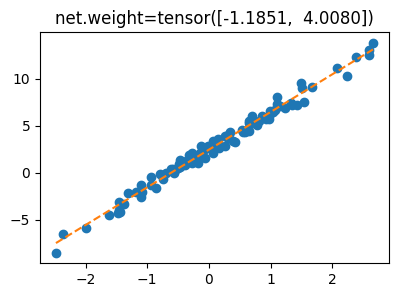

In [74]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

`-` 나쁘지 않은 이유?

In [76]:
net.weight

In [77]:
net.bias